<a href="https://colab.research.google.com/github/Allanx495/Allanx495/blob/main/House_Price_Predictor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df = pd.read_csv('/content/drive/My Drive/AISC/realtor-data.csv')

df.head()

# Display the first few rows of the dataframe



Mounted at /content/drive


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
print(df.shape)

(2226382, 12)


In [ ]:
# Remove NaN values
df = df.dropna()

# Remove duplicates
df = df.drop_duplicates()

# Display the shape of the dataframe to confirm changes
print(df.shape)


(1084909, 12)


In [ ]:
# Isolate numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Display the numerical columns
numerical_df.head()


,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
502,92147.0,110000.0,7.0,3.0,0.09,1842706.0,949.0,1192.0
2270,94933.0,950000.0,5.0,4.0,0.99,1260473.0,802.0,5000.0
2277,103341.0,6899000.0,4.0,6.0,0.83,17467.0,802.0,4600.0
3409,21163.0,525000.0,3.0,3.0,0.45,1813270.0,1001.0,2314.0
3410,67455.0,289900.0,3.0,2.0,0.36,1698080.0,1001.0,1276.0


In [ ]:
df_cleaned = df[
    (df['price'] <= 10000000) &
    (df['bed'] <= 10) &
    (df['bath'] <= 10) &
    (df['house_size'] <= 5000) &
    (df['acre_lot'] <= 10)
]

print("First 5 rows of the cleaned data:")
print(df_cleaned.head())


First 5 rows of the cleaned data:
   brokered_by    status     price  bed  bath  acre_lot     street  \
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
5     103378.0  for_sale  179000.0  4.0   3.0      0.46  1850806.0   

            city        state  zip_code  house_size prev_sold_date  
0       Adjuntas  Puerto Rico     601.0       920.0            NaN  
1       Adjuntas  Puerto Rico     601.0      1527.0            NaN  
2     Juana Diaz  Puerto Rico     795.0       748.0            NaN  
3          Ponce  Puerto Rico     731.0      1800.0            NaN  
5  San Sebastian  Puerto Rico     612.0      2520.0            NaN  


In [ ]:
X = df_cleaned[['bed', 'bath', 'house_size', 'acre_lot']]

# Target variable is 'price'
y = df_cleaned['price']


In [ ]:
#test/train data
# 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("\nLinear Regression Results: ")
print(f"Mean Squared Error: {mse_lin:.2f}")
print(f"R-squared (R2): {r2_lin:.4f}")



Linear Regression Results: 
Mean Squared Error: 199607988006.98
R-squared (R2): 0.2262


In [ ]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)


y_pred_tree = tree_model.predict(X_test)


mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nDecision Tree Results: ")
print(f"Mean Squared Error: {mse_tree:.2f}")
print(f"R-squared (R2): {r2_tree:.4f}")



Decision Tree Results: 
Mean Squared Error: 319238914693.05
R-squared (R2): -0.2376


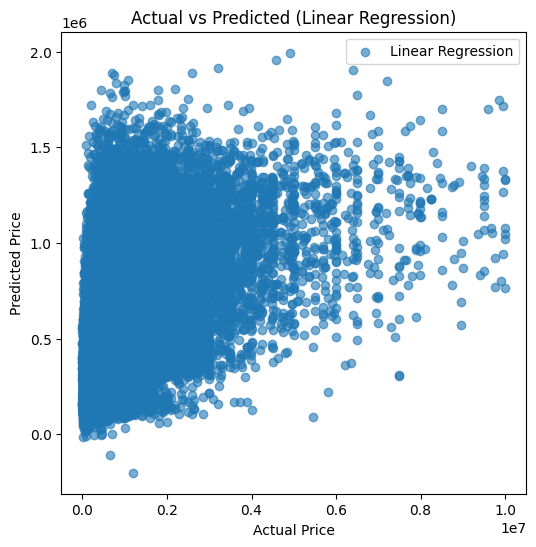

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


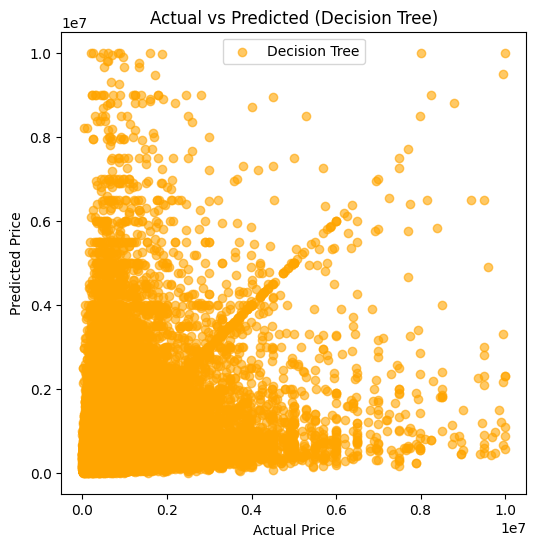

In [ ]:
# LR plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lin, alpha=0.6, label='Linear Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted (Linear Regression)')
plt.legend()
plt.show()

# DT plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_tree, alpha=0.6, color='orange', label='Decision Tree')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted (Decision Tree)')
plt.legend()
plt.show()
